In [65]:
%pip install realpython-reader

Note: you may need to restart the kernel to use updated packages.


#1 

Machine learning is best used when the data is labeled, sorted, and relevant to the information you are trying to interpret. Machine learning is best utilized when the data that you want to interpret would need to be done in a non-deterministic way such as when filtering emails for spam as there is no concrete way to determine if an email is spam mail using Boolean logical statements or present keywords in emails. Machine learning is best used when there are simply too many variables to consider, and they interact to closely with one another for a human coder to reliably create rules to interpret the data. Machine learning is most effectively used to scale up data processing as it is capable of increasing the amounts and types of data processed in a more efficient way than traditional logical interpretation. Machine learning is not worth using if the data you are interpreting can be done with simple rules or by basic logical processes as machine learning has an initial startup period where it is less efficient at processing data until a threshold value is crossed in matters of data complexity where in it becomes faster and more efficient as well as more accurate than traditional data processing measures. Machine learning also requires concisely labeled and kept data so it cannot be used if the data is inherently Un labelable then machine learning is an impossibility. 

In [8]:
import pandas as pd
import numpy as np
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from reader import feed
import time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import logit
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import ConfusionMatrixDisplay

tdf = pd.read_csv("titanic.csv")
tdf.head()
tdf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
tdf.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
tdf['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [11]:
#2

In [12]:
# simply changing the names of the embarked to be understandable by people unaware of the letter meanings
tdf["Embarked"]=np.where(tdf["Embarked"]=="C","Cherbourg",
                                    np.where(tdf["Embarked"]=="Q","Queensland",
                                            "Southampton"))
# One hot encoding the embarked data to make processing easier
tdf = pd.get_dummies(tdf, columns=['Embarked'])

In [13]:
# changed sex to a number to allow for quicker processing times
sex_map = {'female':1,'male':2}
tdf['Sex'] = tdf['Sex'].map(sex_map)
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Cherbourg,Embarked_Queensland,Embarked_Southampton
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,NaN,False,False,True


In [14]:
# 3
tdf2 = tdf[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]
tdf2.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Sex,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.543351
Age,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,1.000000


<Axes: >

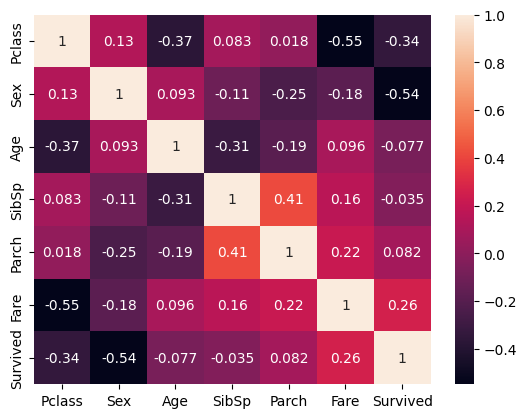

In [15]:
sns.heatmap(tdf2.corr(), annot=True)

While the survived statistics are incredibly unhelpful as survivor ship is a binary mode and as such lends it self unwell to non binary comparrison 1 number suggests a higher than average correlation which is sex as sex was also a binary variable its trends could be shown much more it suggested than women were far more likely to have survived which does match records of women being among the first to be evacuated. Another trend is the correlation between having a sibling or spouse and having a parent or child with you on the boat. This suggests that likely whole families were moving together across multiple generations. The most correlated values were the fare and passenger class which is to be expected as the passenger classes determined the cost of your fare. There was suprisingly little correlation between age and surviving which i though would have been higher given the historical precedent that children were among the first to be evacuated but that could likely be drowned out as the population of ages on the titanic was heavily favored to the adults so the statistics could simply be drowned out.

In [16]:
tdf['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x176e1fee3e0>,
 'caps': [<matplotlib.lines.Line2D at 0x176e1fee920>,
 'boxes': [<matplotlib.lines.Line2D at 0x176e1fee170>],
 'medians': [<matplotlib.lines.Line2D at 0x176e1feee60>],
 'fliers': [<matplotlib.lines.Line2D at 0x176e1fef100>],
 'means': []}

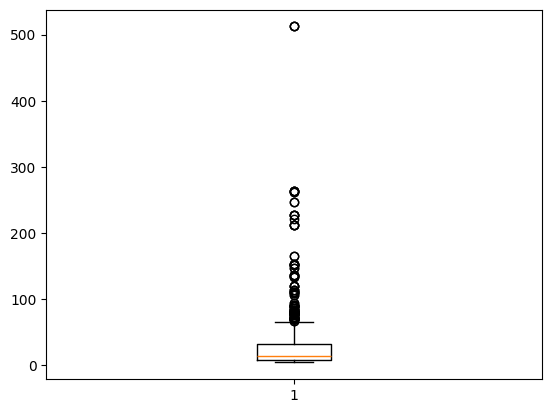

In [17]:
# 4
filtered_list = tdf['Fare'][tdf['Fare']!= 0]
plt.boxplot(filtered_list)

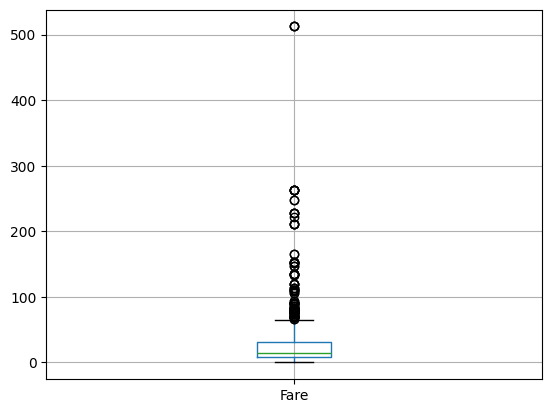

In [18]:
boxplot = tdf.boxplot(column = ['Fare'], return_type='axes')

Both boxplots show that fares were heavily skewed to the low end with even the 75% line sitting below the $50 mark which given the time period is actually kind of pricey although given it was the maiden voyage of a massive cruise ship still quite cheap. The first boxplot is calculated without the use of the 0 values as I was unsure what null value meant in regards to fare prices while the second boxplot does contain 0's but even then the data is almost the same visually as compared to the total amount of data the 0 values were not that significant a part of the population. 

In [19]:
# 5 
def quarter1(data):
    
    start1 = time.perf_counter()
    age_list1 = tdf['Age'].tolist()
    age_bin_list1 = list(map(lambda x:"60+" if x>=60 else "40-59" if 40<=x<60 else "20-39" if 20<=x<40 else "<20", age_list1))
    tdf['age_bin']= age_bin_list1
    end1 = time.perf_counter()
    runtime1 = end1-start1
    print(runtime1)
quarter1(tdf['Age'])
tdf.head()

0.001095999963581562


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Cherbourg,Embarked_Queensland,Embarked_Southampton,age_bin
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,20-39
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,True,False,False,20-39
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,20-39
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,False,True,20-39
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,NaN,False,False,True,20-39


In [26]:
start2 = time.perf_counter()
age_list2 = tdf['Age'].tolist()
age_bin_list2 = list(map(lambda x: "<20" if x<20 
                         else "20-39" if 20<=x<40 
                         else "40-59" if 40<=x<60 
                         else "60+", age_list2))
tdf['age_bin2'] = age_bin_list2
end2 = time.perf_counter()
runtime2 = end2-start2
print(runtime2)
tdf.head(25)

0.00047019985504448414


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Cherbourg,Embarked_Queensland,Embarked_Southampton,age_bin,age_bin2
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,20-39,20-39
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,True,False,False,20-39,20-39
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,20-39,20-39
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,False,True,20-39,20-39
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,NaN,False,False,True,20-39,20-39
5,6,0,3,"Moran, Mr. James",2,NaN,0,0,330877,8.4583,NaN,False,True,False,<20,60+
6,7,0,1,"McCarthy, Mr. Timothy J",2,54.0,0,0,17463,51.8625,E46,False,False,True,40-59,40-59
7,8,0,3,"Palsson, Master. Gosta Leonard",2,2.0,3,1,349909,21.0750,NaN,False,False,True,<20,<20
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,False,False,True,20-39,20-39
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,True,False,False,<20,<20


Based on what is reported above the lanbda function runs at the same spee there about regardless of if you count down or up when making your groups which is to be excpected as they function roughly the same and are working with the same data set the only difference between them being that one stores the NaN values as 60+ the count up version and the count down version stores NaN values as <20 which is far closer to the main bulk of the data and is as such more likely to be correct given the distribution of ages heavily favors the younger population

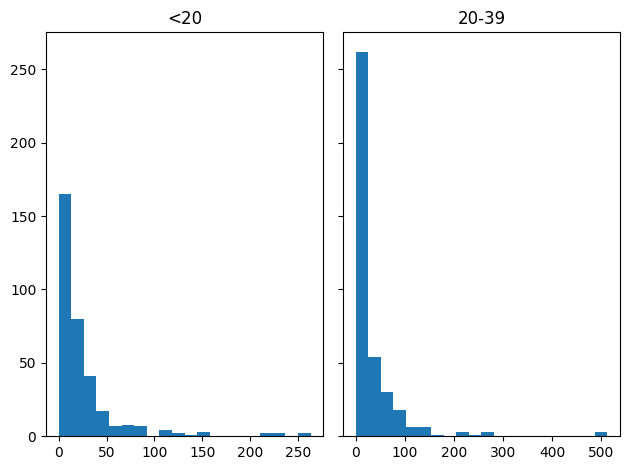

In [27]:
# 6
tdf1 = tdf[tdf['age_bin'] == '<20']
tdf2 = tdf[tdf['age_bin'] == '20-39']
tdf3 = tdf[tdf['age_bin'] == '40-59']
tdf4 = tdf[tdf['age_bin'] == '60+']

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(tdf1['Fare'], bins=20)
axs[0].set_title('<20')
axs[1].hist(tdf2['Fare'], bins=20)
axs[1].set_title('20-39')

plt.show()

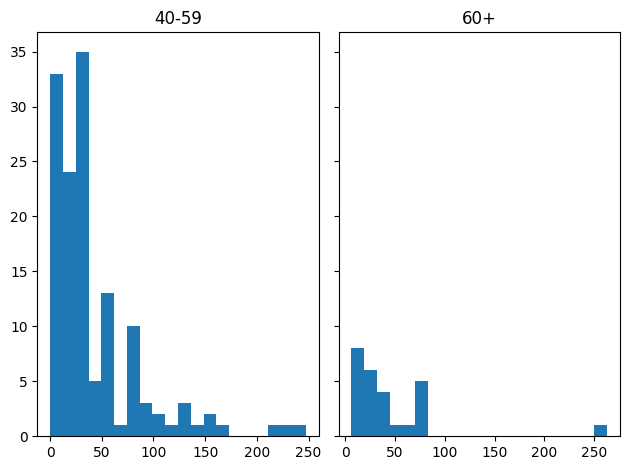

In [28]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(tdf3['Fare'], bins=20)
axs[0].set_title('40-59')
axs[1].hist(tdf4['Fare'], bins=20)
axs[1].set_title('60+')

plt.show()

The findings as shown above indicate that not only where the vast majority of passengers paying under 50 dollars a ticket in each range group the largest but the under 40 section were by far the biggest age groups the other interesting fact is that the trend of price distribution is roughly similar across all groups except for the above 60 age group but that age group is so small that it doesnt have enough data to compare to the other larger data groups. The trend of an inverse J curve is presentin all data sets with a relevant amount of data to compare with.

In [34]:
# I picked this method as it is the one I have the most understanding of mechanically and I thought it to be the best fit for logistical regression

X = tdf[['Sex','Pclass','Fare']]
y = tdf['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=42, 
                                                    stratify=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

regression = LogisticRegression(random_state=42).fit(X_train, y_train)
y_predicted = regression.predict(X_test)

y_predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1])

In [35]:
regression.score(X_test, y_test)

0.7723880597014925

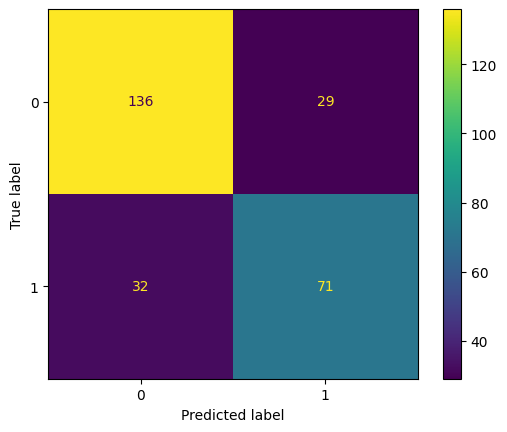

In [36]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)

In [43]:
def p_a_r(calc_type:str, tp: int, tn: int,
                        fp: int, fn: int) -> float:
    """
    This function produces precision or recall based on
    what is passed in
    """
    if calc_type == "p":
        value = tp / (tp + fp)
        return value
    elif calc_type == "r":
        value = tp / (tp + fn) 
        return value
    elif calc_type == "a":
        value = (tp+tn)/(tp+fp+tn+fn)
        return value
    else:
        error_msg = "something happened here. check your inputs"
        return error_msg

In [44]:
p_a_r("p", 71, 136, 29, 32)

0.71

In [45]:
p_a_r("r", 71, 136, 29, 32)

0.6893203883495146

In [46]:
p_a_r("a", 71, 136, 29, 32)

0.7723880597014925